<a href="https://colab.research.google.com/github/hazelerate/Ecommerce_Customer_Churn_Analysis_and_Prediction/blob/main/Ecommerce_Customer_Retention_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecommerce Customer Retention Analysis and Prediction

The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly the company can approach customer to offer some promos.

Dataset source: https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix as cm
from sklearn.metrics import classification_report as cr

In [ ]:
#load dataset
filename = '/content/drive/MyDrive/Data Set/project 2 dataset/Ecommerce_dataset - E Comm.csv'
df = pd.read_csv(filename)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [ ]:
df.shape

(5630, 20)

In [ ]:
#show data information to know if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Target would be the "Churn" column which provides information weather a customer churns or not. This is a classification type of problem that we will go through.



##Data Cleaning

In [ ]:
#check for duplicate rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5625    False
5626    False
5627    False
5628    False
5629    False
Length: 5630, dtype: bool

In [ ]:
#check general structure of the dataset
#get the column names
column_names = df.columns

In [ ]:
#for each columns, print value counts
for column_name in column_names:
  print(df[column_name].value_counts())

50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: CustomerID, Length: 5630, dtype: int64
0    4682
1     948
Name: Churn, dtype: int64
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: Tenure, dtype: int64
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
1    3666
3    1722
2     242
Name: CityTier, dtype: int64
9.0      559
8.0      444
7.0      389
16.0     322
14.0     299
6.0      295
15.0     288
10.0     274
13.0     249
11.0     233
12.0     221
17.0     217
22.0     1

In [ ]:
#check for any inconsistencies under 'Tenure' column and correct them.
list(df['Tenure'].unique())

[4.0,
 nan,
 0.0,
 13.0,
 11.0,
 9.0,
 19.0,
 20.0,
 14.0,
 8.0,
 18.0,
 5.0,
 2.0,
 30.0,
 1.0,
 23.0,
 3.0,
 29.0,
 6.0,
 26.0,
 28.0,
 7.0,
 24.0,
 25.0,
 10.0,
 15.0,
 22.0,
 27.0,
 16.0,
 12.0,
 21.0,
 17.0,
 50.0,
 60.0,
 31.0,
 51.0,
 61.0]

In [ ]:
#check for any inconsistencies under 'PreferredLoginDevice' column and correct them.
list(df['PreferredLoginDevice'].unique())

['Mobile Phone', 'Phone', 'Computer']

In [ ]:
#To create consistent data, all 'Phone' entries will be replaced by 'Mobile Phone'
df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone', inplace = True)

In [ ]:
#check if all data will be either 'Mobile Phone' or 'Computer'
list(df['PreferredLoginDevice'].unique())

['Mobile Phone', 'Computer']

In [ ]:
#check for any inconsistencies under 'PreferredPaymentMode' column and correct them.
list(df['PreferredPaymentMode'].unique())

['Debit Card',
 'UPI',
 'CC',
 'Cash on Delivery',
 'E wallet',
 'COD',
 'Credit Card']

In [ ]:
#To create consistent data, all 'CC' entries will be replaced by 'Credit Card'
df['PreferredPaymentMode'].replace('CC', 'Credit Card', inplace = True)

In [ ]:
#To create consistent data, all 'CC' entries will be replaced by 'Credit Card'
df['PreferredPaymentMode'].replace('COD', 'Cash on Delivery', inplace = True)

In [ ]:
#check if data is now consistent
list(df['PreferredPaymentMode'].unique())

['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']

In [ ]:
#check for any inconsistencies under 'PreferedOrderCat' column and correct them.
list(df['PreferedOrderCat'].unique())

['Laptop & Accessory',
 'Mobile',
 'Mobile Phone',
 'Others',
 'Fashion',
 'Grocery']

In [ ]:
#To create consistent data, all 'Phone' entries will be replaced by 'Mobile Phone'
df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone', inplace = True)

In [ ]:
#check if data is now consistent
list(df['PreferedOrderCat'].unique())

['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion', 'Grocery']

In [ ]:
Churn_sum = sum(df['Churn'] == 1)
Stay_sum = sum(df['Churn'] == 0)
Churn_rate = np.round(Churn_sum / Stay_sum, 2)
print('Customers Churn rate is', Churn_rate * 100, '%')

Customers Churn rate is 20.0 %


In [ ]:
data_description = df.describe().T
data_description

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


##Data Visualizations

Let's explore the data that we currently have to see what they are trying to tell us

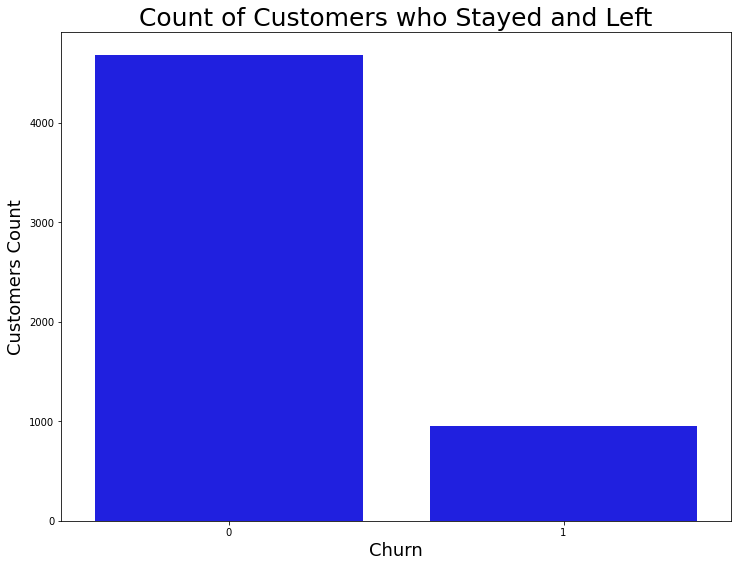

In [ ]:
from pandas.core.algorithms import value_counts
fig = plt.figure(figsize =(12, 9))
plt.title('Count of Customers who Stayed and Left', size=25)
sns.countplot(x = 'Churn', data = df, color='b');
plt.xlabel("Churn", size=18)
plt.ylabel("Customers Count", size=18)
plt.savefig('Customers Churn.png', dpi = 300)

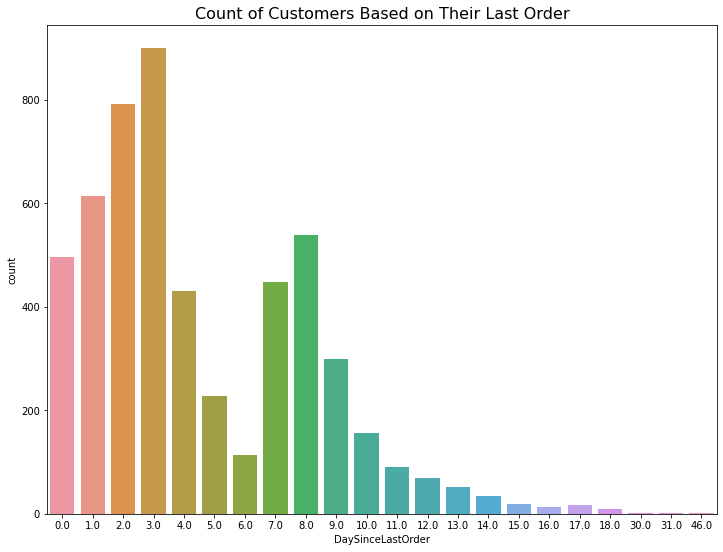

In [ ]:
fig = plt.figure(figsize =(12, 9))
plt.title('Count of Customers Based on Their Last Order', size=16)
sns.countplot(x = 'DaySinceLastOrder', data = df);
plt.savefig('Count of Customers Based on Their Last Order.png', dpi = 300)

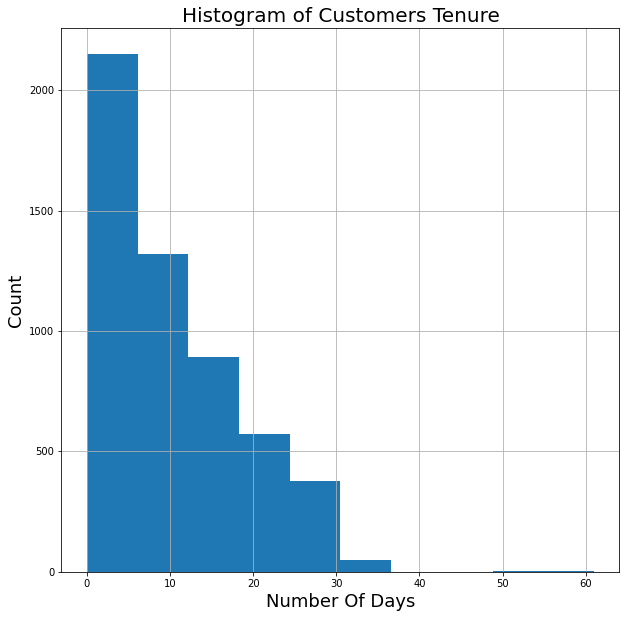

In [ ]:
df['Tenure'].hist(figsize=(10,10));
plt.title('Histogram of Customers Tenure', size=20)
plt.xlabel("Number Of Days", size=18)
plt.ylabel("Count", size=18)
plt.savefig('Customers Tenure Histogram.png', dpi = 300)

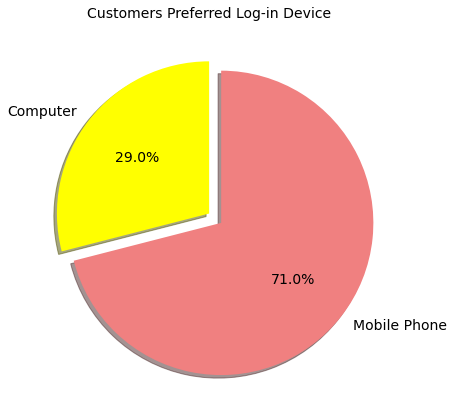

In [ ]:
##Data Visualizations
#pie chart

# get percentage of preffered Login device
PLD = df['PreferredLoginDevice'].value_counts()
PLD = PLD.sort_index()
total = PLD.values.sum()
values = [round(i/total*100,0) for i in PLD.values]

# display pie chart
fig = plt.figure(figsize =(10, 7))
colors = ['yellow', 'lightcoral']
explode = (0, 0.1)
plt.title("Customers Preferred Log-in Device", size=14)
plt.pie(values, explode=explode, labels = PLD.keys(), colors=colors, autopct='%1.1f%%',startangle=90, shadow=True, textprops={'fontsize': 14});
plt.savefig('Customers Preferred Log-in Device.png', dpi = 300)

Most customers are using Mobile phones to log in.

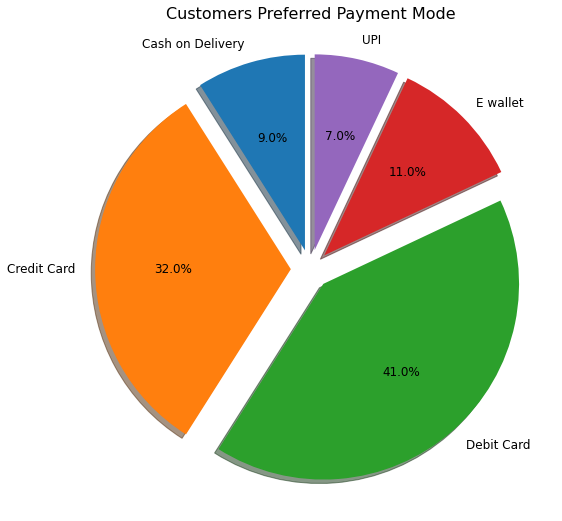

In [ ]:
# get percentage of preffered payment method
PPM = df['PreferredPaymentMode'].value_counts()
PPM = PPM.sort_index()
total = PPM.values.sum()
values = [round(i/total*100,0) for i in PPM.values]

# display pie chart
fig = plt.figure(figsize =(12, 9))
colors = ['lightgreen', 'red']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
plt.title("Customers Preferred Payment Mode", size=16)
plt.pie(values, explode=explode, labels = PPM.keys(), autopct='%1.1f%%', startangle=90, shadow=True, textprops={'fontsize': 12});
plt.savefig('PreferredPaymentMode.png', dpi = 300)

Almost half of the customers are using debit card as their preferred payment method followed by Credit Card with the least number of customers using UPI method.

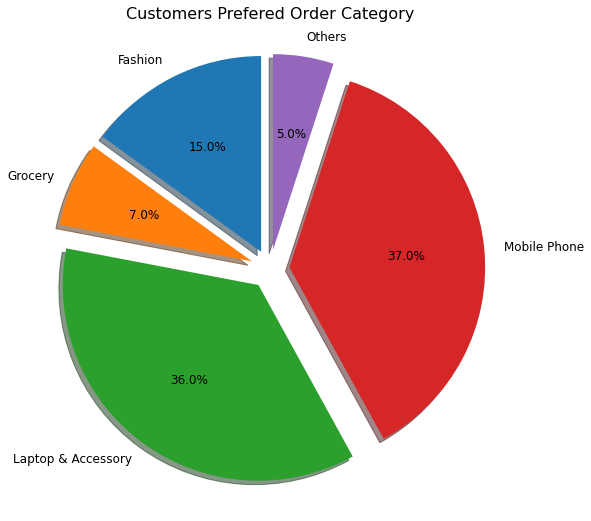

In [ ]:
# get percentage of preffered payment method
POC = df['PreferedOrderCat'].value_counts()
POC = POC.sort_index()
total = POC.values.sum()
values = [round(i/total*100,0) for i in POC.values]

# display pie chart
fig = plt.figure(figsize =(12, 9))
colors = ['lightgreen', 'red']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
plt.title("Customers Prefered Order Category", size=16)
plt.pie(values, explode=explode, labels = POC.keys(), autopct='%1.1f%%', startangle=90, shadow=True, textprops={'fontsize': 12});
plt.savefig('PreferedOrderCat.png', dpi = 300)

Gadgets such as Mobile phones and laptop & accessories are the best selling categories order from the platform.

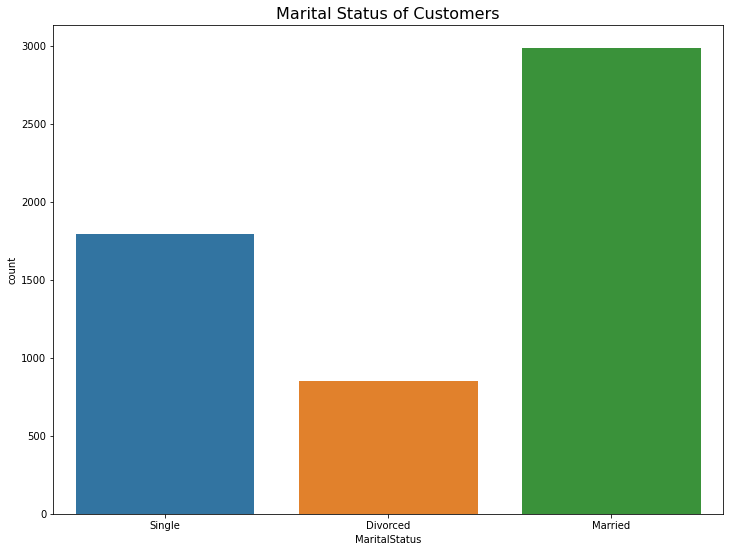

In [ ]:
fig = plt.figure(figsize =(12, 9))
plt.title('Marital Status of Customers', size=16)
sns.countplot(x = 'MaritalStatus', data = df);

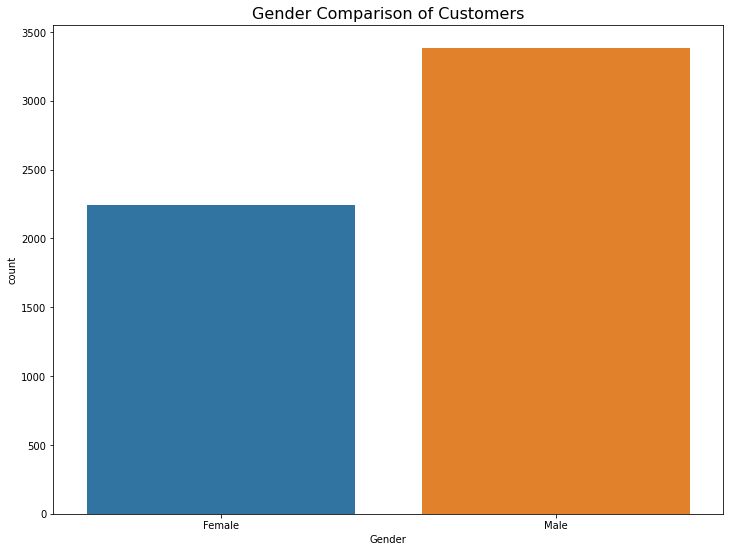

In [ ]:
fig = plt.figure(figsize =(12, 9))
plt.title('Gender Comparison of Customers', size=16)
sns.countplot(x = 'Gender', data = df);


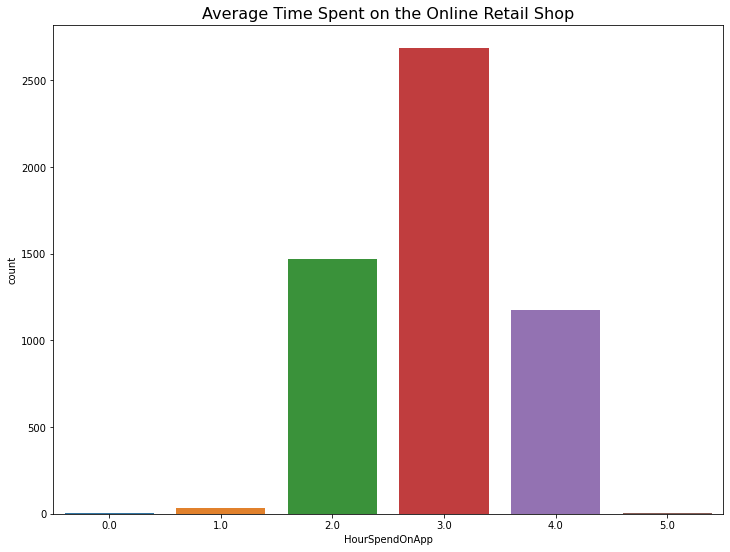

In [ ]:
fig = plt.figure(figsize =(12, 9))
plt.title('Average Time Spent on the Online Retail Shop', size=16)
sns.countplot(x = 'HourSpendOnApp', data = df);

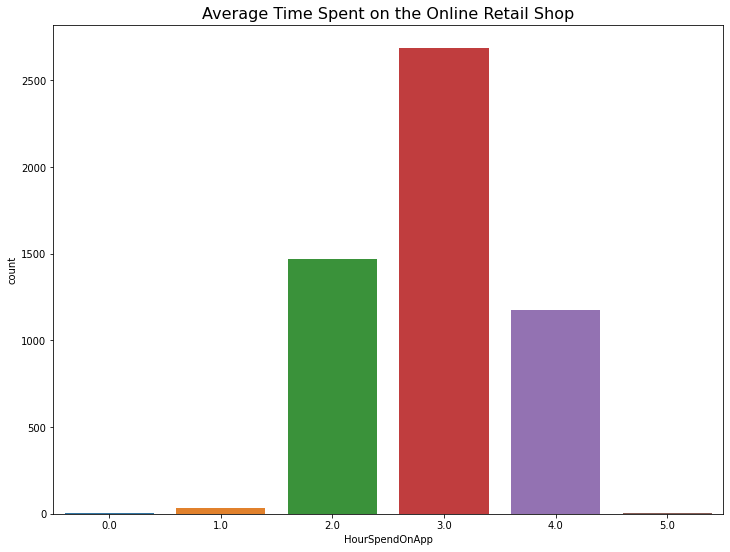

In [ ]:
fig = plt.figure(figsize =(12, 9))
plt.title('Average Time Spent on the Online Retail Shop', size=16)
sns.countplot(x = 'HourSpendOnApp', data = df);

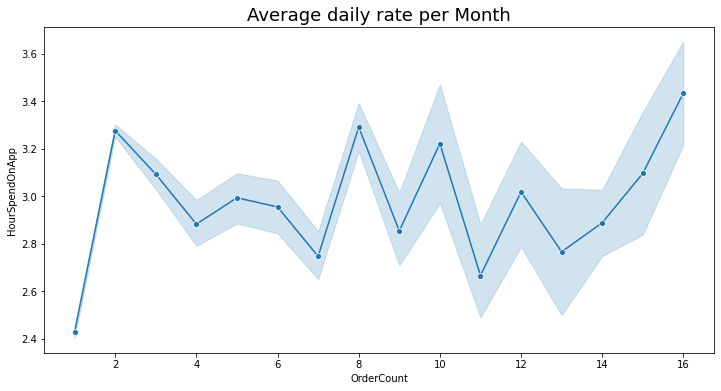

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='OrderCount', y='HourSpendOnApp', marker = '.', markersize = 12, data= df)
plt.title("Average daily rate per Month", size=18)
plt.savefig('Average Daily Rate over Months.png', dpi = 300)

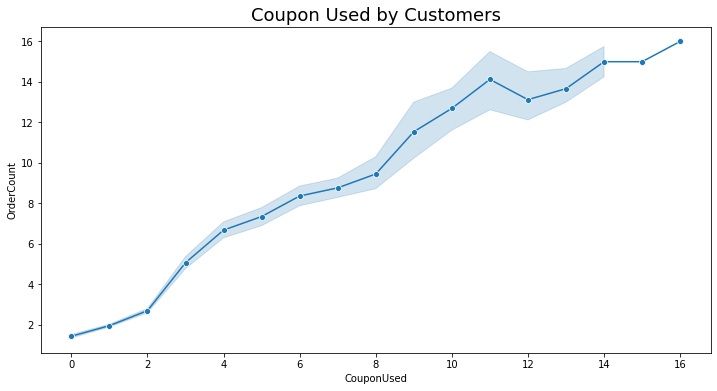

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='CouponUsed', y='OrderCount', marker = '.', markersize = 12, data= df)
plt.title("Coupon Used by Customers", size=18)
plt.savefig('Average Daily Rate over Months.png', dpi = 300)

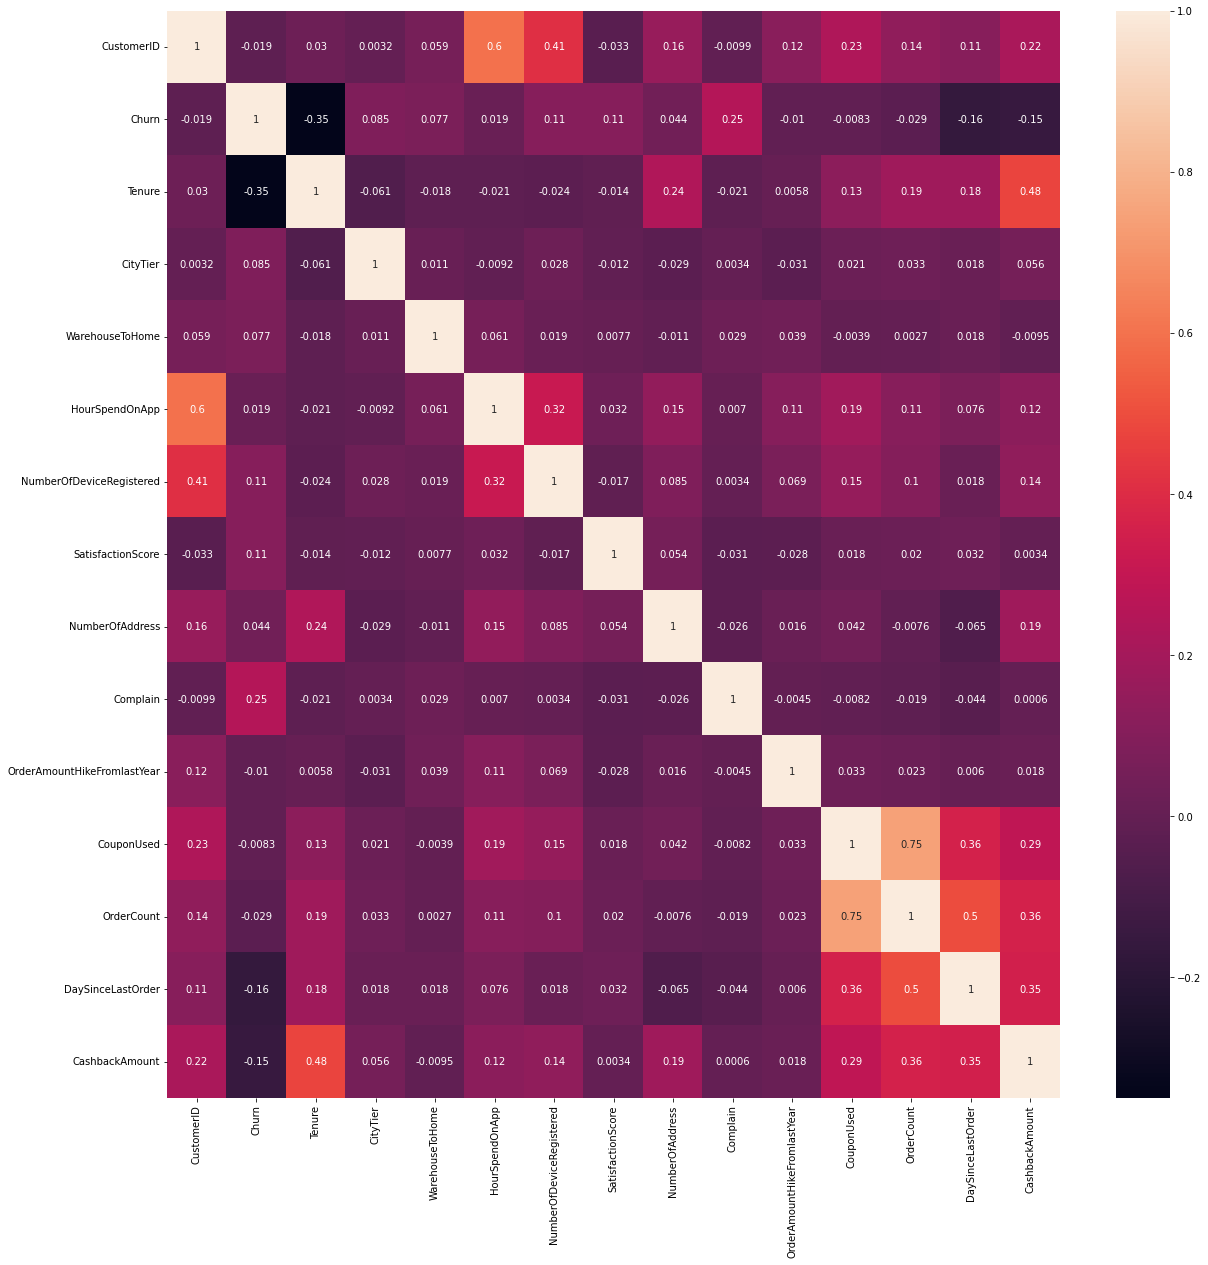

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True);
plt.savefig('Correlation Matrix', dpi = 300)

##Data Pre-processing

In [ ]:
# by using normalize = True with value_counts, our output is the percentage of each class (written as a decimal)
df['Churn'].value_counts(normalize = True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [ ]:
#check for missing values
print(df.isna().sum().sum(), 'missing values')

1856 missing values


In [ ]:
#get the feature and target values
X = df.drop(columns=['Churn', 'CustomerID' ])
y = df['Churn']

In [ ]:
# map categorical values into numbers

# for each categorical columns
cat_selector = make_column_selector(dtype_include='object')
cat_data = X[cat_selector(X)]

# for each categorical columns
for c_name in cat_data.columns:
    
    # print the column name
    print(c_name)

    # get unique values from that column
    values_list = df[c_name].unique()

    # initialize the dictionary (mapper)
    col_dictionary = dict()

    # for each value in that column
    for index, value in enumerate(values_list):
        
        # display the index(position) and value
        #print(index, value)

        # add the 'value: index' to the dictionary
        col_dictionary[value] = index

    #print(col_dictionary)

    # replace values in that column
    X[c_name].replace(col_dictionary, inplace=True)

PreferredLoginDevice
PreferredPaymentMode
Gender
PreferedOrderCat
MaritalStatus


In [ ]:
X

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,0,3,6.0,0,0,3.0,3,0,2,0,9,1,11.0,1.0,1.0,5.0,160
1,NaN,0,1,8.0,1,1,3.0,4,1,3,0,7,1,15.0,0.0,1.0,0.0,121
2,NaN,0,1,30.0,0,1,2.0,4,1,3,0,6,1,14.0,0.0,1.0,3.0,120
3,0.0,0,3,15.0,0,1,2.0,4,0,5,0,8,0,23.0,0.0,1.0,3.0,134
4,0.0,0,1,12.0,2,1,NaN,3,1,5,0,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,1,1,30.0,2,1,3.0,2,0,1,2,6,0,18.0,1.0,2.0,4.0,151
5626,13.0,0,1,13.0,2,1,3.0,5,3,5,2,6,0,16.0,1.0,2.0,NaN,225
5627,1.0,0,1,11.0,0,1,3.0,2,0,4,2,3,1,21.0,1.0,2.0,4.0,186
5628,23.0,1,3,9.0,2,1,4.0,5,0,4,2,4,0,15.0,2.0,2.0,9.0,179


In [ ]:

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#Select columns
#instantiate the selectors to for numeric and categorical data types
num_selector = make_column_selector(dtype_include='number')
#cat_selector = make_column_selector(dtype_include='object')
#select the numeric columns of each type

In [ ]:
#'Mean' strategy to be used to fill in missing numerical data and 'most_frequent' strategy to fill in the missing categorical data
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()

In [ ]:
#create pipeline
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer)

In [ ]:
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [ ]:
column_transformer = make_column_transformer(num_tuple, cat_tuple)
column_transformer.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe46f1a3450>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe46f1acb10>)])

In [ ]:
X_train_processed = column_transformer.transform(X_train)
X_test_processed = column_transformer.transform(X_test)

In [ ]:
X_train_processed

array([[-0.85867649, -0.64153569, -0.72205847, ..., -0.0133712 ,
        -1.27682013, -0.53470397],
       [-1.0962468 ,  1.55875974, -0.72205847, ..., -0.35862231,
        -0.42957907, -0.26862696],
       [-0.38353587,  1.55875974, -0.72205847, ..., -0.35862231,
        -0.99440644, -0.65750874],
       ...,
       [-0.38353587, -0.64153569, -0.72205847, ..., -0.35862231,
        -0.42957907, -0.28909442],
       [-1.0962468 , -0.64153569, -0.72205847, ..., -0.35862231,
        -0.42957907, -0.26862696],
       [-1.21503195, -0.64153569, -0.72205847, ...,  1.02238215,
         0.70007567, -0.30956188]])

##Boosted Model:

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_processed, y_train)

XGBClassifier()

In [ ]:
print('Training accuracy:', xgb.score(X_train_processed, y_train))
print('Testing accuracy:', xgb.score(X_test_processed, y_test))

Training accuracy: 0.9296541923259118
Testing accuracy: 0.9147727272727273


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


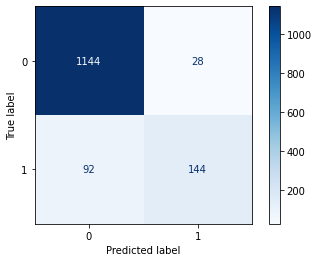

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb, X_test_processed, y_test, cmap = 'Blues');

## Model 2

In [ ]:
# create the model using Decision Tree Classifier (Source: Coding Dojo learning platform)
model2 = DecisionTreeClassifier(random_state = 42)
model2

DecisionTreeClassifier(random_state=42)

In [ ]:
model2.fit(X_train_processed, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_hat = model2.predict(X_test_processed)

In [ ]:
# evaluate the model
DTC_train_score = model2.score(X_train_processed, y_train)
DTC_test_score = model2.score(X_test_processed, y_test)
print(DTC_train_score)
print(DTC_test_score)

1.0
0.9524147727272727


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


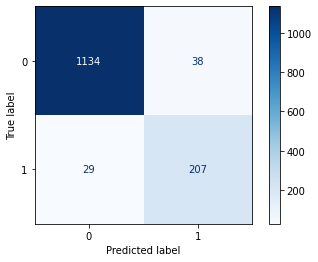

In [ ]:
#plot confusion matrix
plot_confusion_matrix(model2, X_test_processed, y_test, cmap = 'Blues');
plt.savefig('Confusion Matrix.png', dpi = 300)

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model2.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
0,Tenure,0.261
17,CashbackAmount,0.085
13,OrderAmountHikeFromlastYear,0.082
3,WarehouseToHome,0.071
16,DaySinceLastOrder,0.070
11,NumberOfAddress,0.066
12,Complain,0.066
9,SatisfactionScore,0.052
4,PreferredPaymentMode,0.042
10,MaritalStatus,0.040


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


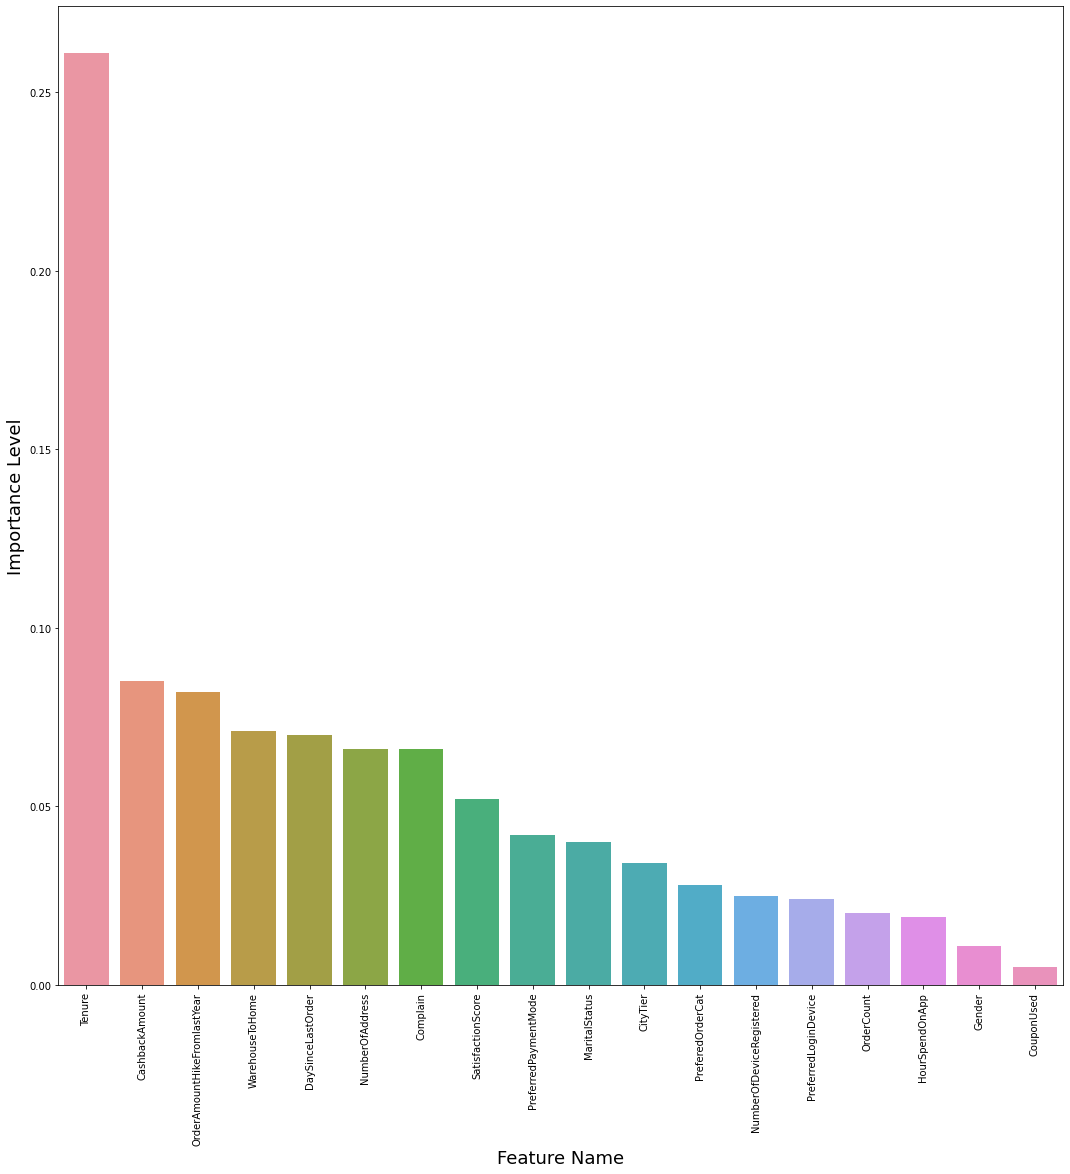

In [ ]:
feature_names = X_train.columns.values
fig = plt.figure(figsize =(18, 18))
sns.barplot(importances['feature'], importances['importance']);
plt.xticks(rotation = 90)
plt.xlabel("Feature Name", size=18)
plt.ylabel("Importance Level", size=18)
plt.savefig('Importances.png', dpi = 300)